<a href="https://www.kaggle.com/code/bhavinmoriya/beta-of-a-stock-capm-from-scratch?scriptVersionId=112597477" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Beta of the security measures how the given security performs in comparision to market, say S&P 500 (if you are calculating US Stock. Generally, each country has some index which represent the market). Beta tells the following,
1. $\beta = 0$ No relation to the market (i.e S&P500)
2. $\beta = 1$ Performs same as the market
3. $\beta < 1$ Lose less in recession and makes less in flourishing economy
4. $\beta > 1$ Lose more in recession and makes more in flourinshing economy
5. $\beta < 0$ Negatively related to market. That is, if market goes up, security (used interchangeably with stock) goes down and vice versa.

We shall, try to find Beta for tesla. To find beta one usually, considers last 5 year data with monthly period.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime as dt, timedelta as td
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
sns.set()
import pandas_datareader as web

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

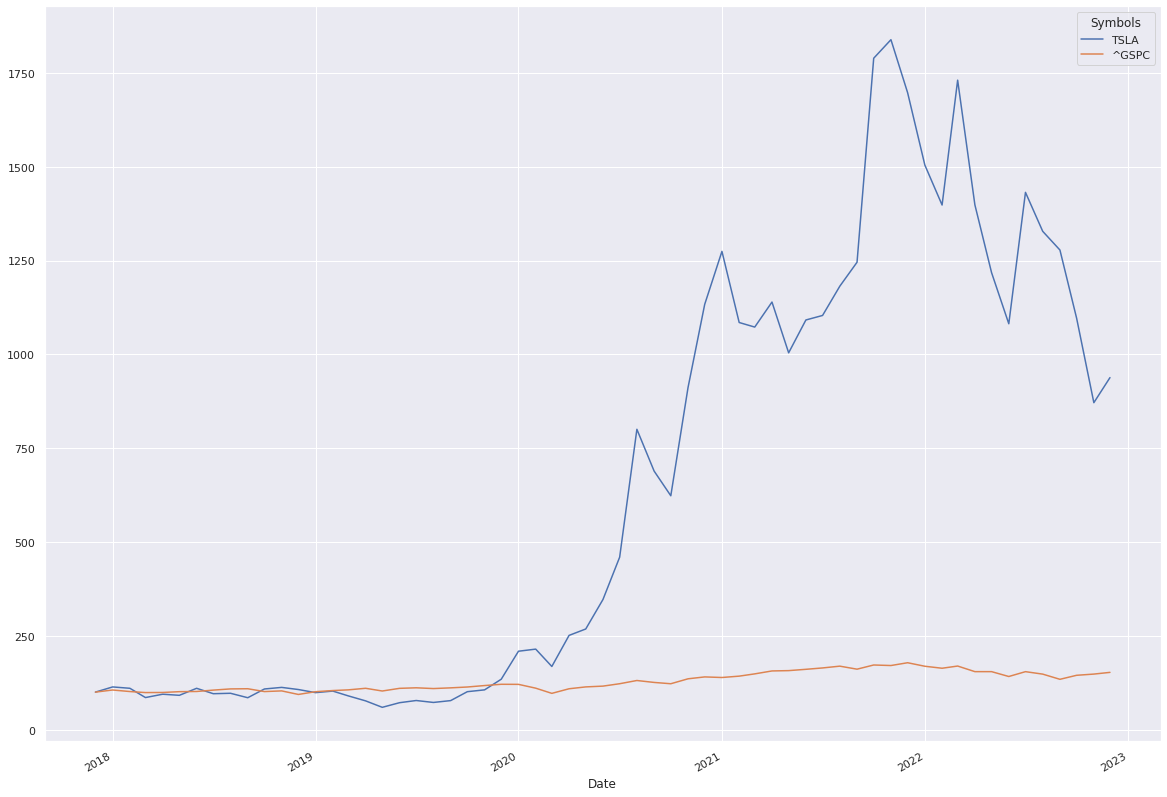

In [2]:
stocks = 'TSLA ^GSPC'.split()
df = web.get_data_yahoo(stocks, start=dt.today() - td(days=365*5), 
                       interval='m')['Adj Close']
(df * 100 / df.iloc[0]).plot(figsize=(20,15));

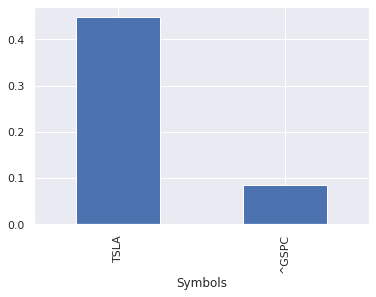

In [3]:
df_return = np.log(df / df.shift())
(df_return.mean() * 12).plot.bar();

TSLA is about 44% annual return, while S&P is about 8%, so we expect beta is more than 1.

$$\beta = \frac{\textit{Cov}(TSLA, S\& P)}{\textit{Var}(S\& P)}$$

In [4]:
cov = df_return.cov() * 12
cov

Symbols,TSLA,^GSPC
Symbols,,
TSLA,0.419203,0.059261
^GSPC,0.059261,0.034071


In [5]:
market_cov = cov.iloc[0,1]
var_market = cov.iloc[1,1]
beta_tsla = market_cov / var_market
print(f'Beta (5Y period) of TSLA is : {beta_tsla}')

Beta (5Y period) of TSLA is : 1.739324771222762


In [6]:
def get_beta(stock, start=dt.today() - td(days=365*5)):
    df = web.get_data_yahoo([stock, '^GSPC'], start=start, interval='m')['Adj Close']
#     (df * 100 / df.iloc[0]).plot(figsize=(20,15))
    
    df_return = np.log(df / df.shift())
    (df_return.mean() * 12).plot.bar()
    plt.title(f'Annual log return of {stock.upper()}')
    cov = df_return.cov() * 12
    market_cov = cov.iloc[0,1]
    var_market = cov.iloc[1,1]
    beta = market_cov / var_market
#     print(f'Beta (5Y period) of {stock.upper()} is : {beta}')
    return beta
    

0.4006023646030831

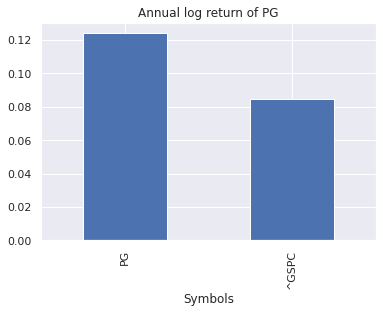

In [7]:
get_beta('PG')

1.739324771222762

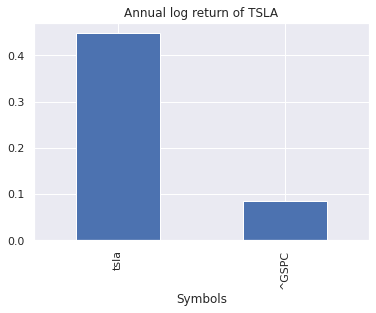

In [8]:
get_beta('tsla')

One can always google Beta value and one can see that it will be nearby.  

# Capital Asset Pricing Model (CAPM)

Return of investement = Risk-Free Return + $\beta \cdot $(Market Return - Risk-Free Return)

- (Market Return - Risk-Free Return) is called Market risk premium. Market research tell that this value is about 5 %
- Risk-Free Return is about 2.5 %

Let us calculate the return for TSLA.

In [9]:
def get_return(stock, start=dt.today() - td(days=365*5), risk_premium=(14.5-2.5), risk_free=2.5):
    '''The average return of the stock market over the long term is just above 10%, as measured 
    by the S&P 500 index. Over the past decade, through to March 31, 2022, the annualized performance of the S&P 500 
    was 14.5%
    
    Risk free rate in US as of 30th Nov is 2.5%'''
    beta = get_beta(stock, start)
    # risk_premium = market return - risk free return
    result = risk_free + beta * risk_premium
    print(f'Expected annual return for {stock.upper()} is {result} %\n')
    return result

Expected annual return for PG is 7.3072262531985395 %



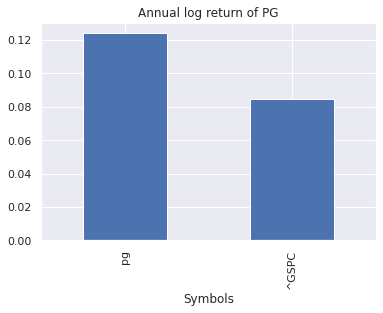

In [10]:
ret = get_return('pg')

Expected annual return for TSLA is 23.371897254673144 %



23.371897254673144

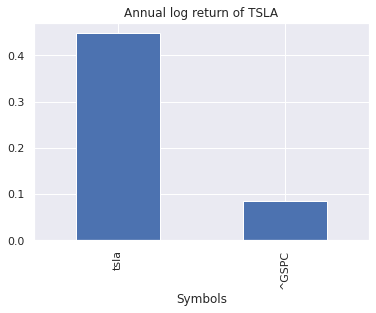

In [11]:
get_return('tsla')

# Sharpe Ratio (SR)

- Measure of return per unit of risk
- SR >= 1 is acceptable. At least 2 or 3 is considered to be very good.
- SR < 1 is not good investment.
- Coefficient of variation measure risk per unit of return (we will explore this sometime)

$$ SR = \Large\frac{r_i - r_f}{\sigma_i}, $$ 
- $r_i$ : Stock i return
- $r_f$ : Risk Free return
- $\sigma_i$ : Stock i std

**Good to know** 
- The Sharpe Ratio, while a useful risk/return measure, is not a perfect. 
- Works well with normally distributed returns, or with return distributions with a minimal presence of skewness and kurtosis.
- Market returns are normal, they have fat tails.



In [12]:
def get_sharpe(stock, start=dt.today()-td(365*5)):
    df = web.get_data_yahoo(stock,start=start)['Adj Close']
#     log_ret = np.log(df / df.shift())
    ret = df.pct_change()
#     ret = np.log(df / df.shift())
    ri = ret.mean()
    # ri is investment return calculated using CAPM
#     ri = get_return(stock) / 100    
    # ri2 is mean log return 
#     ri2 = log_ret.mean() 
#     rf = 2.5 / 100
    rf = 0
#     sigma = log_ret.std() 
    sigma = ret.std()

    sr = (ri - rf) * 250 ** .5 / sigma # annualize the sharpe ratio
#     sr1 = (ri2 - rf) * 250 ** .5/ sigma
#     print(f'Sharpe Ratio, using CAPM and Mean log return, of {stock.upper()} are : {sr, sr1} respectively')
    print(f'Sharpe Ratio of {stock.upper()} is : {sr}')
#     return sr, sr1, ri, ri2
    return sr

In [13]:
get_sharpe('amzn')

Sharpe Ratio of AMZN is : 0.47612592725279546


0.47612592725279546

In [14]:
get_sharpe('pg')

Sharpe Ratio of PG is : 0.6806833876134074


0.6806833876134074

In [15]:
get_sharpe('tsla')

Sharpe Ratio of TSLA is : 1.0179547104445676


1.0179547104445676

In [16]:
get_sharpe('aapl')

Sharpe Ratio of AAPL is : 0.9453274228860248


0.9453274228860248